In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = 0.7 * x

W = np.random.uniform(0,1)
b = np.random.uniform(0,1)

step_size = 0.5
for epoch in range(100):
    y_pred = W*x +b

    objective = np.abs(y_pred - y).mean()

    w_grad = step_size*((y_pred-y)*x).mean()
    b_grad = step_size*(y_pred-y).mean()

    W = W - w_grad
    b = b - b_grad

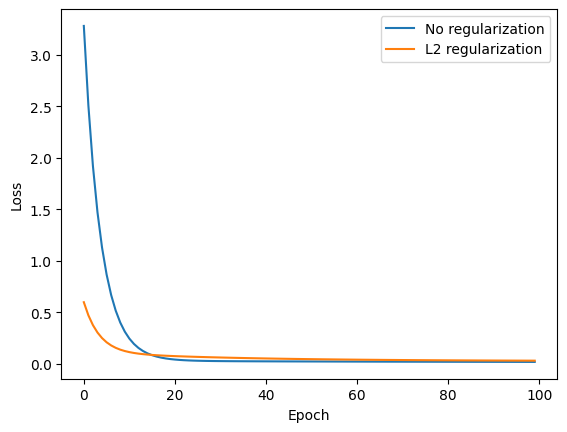

In [3]:
#L2 규제와 규제없을때의 적합도 진행차이

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = 0.5 * x + np.random.normal(scale=0.1, size=(100,))

def linear_regression(x, y, alpha, lambda_, num_epochs):
    W = np.random.randn(1)
    b = np.random.randn(1)
    loss = []
    for epoch in range(num_epochs):
        y_pred = W * x + b
        mse = np.mean(np.square(y_pred - y))
        l2_reg = lambda_ * np.sum(np.square(W))
        loss.append(mse + l2_reg)
        w_grad = alpha * np.mean((y_pred - y) * x) + 2 * lambda_ * W
        b_grad = alpha * np.mean(y_pred - y)
        W -= w_grad
        b -= b_grad
    return W, b, loss

alpha = 0.1
lambda_ = 0.01
num_epochs = 100

# Train model without regularization
W_no_reg, b_no_reg, loss_no_reg = linear_regression(x, y, alpha, 0, num_epochs)

# Train model with L2 regularization
W_reg, b_reg, loss_reg = linear_regression(x, y, alpha, lambda_, num_epochs)

plt.plot(loss_no_reg, label='No regularization')
plt.plot(loss_reg, label='L2 regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()